 <img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2017


En este notebook se aborda el tema de aprendizaje de máquina para clasificación binaria utilizando Regresión Logística:
1. Propagación hacia adelante (forward propagation)
2. Función de pérdida
3. Función de costo
4. Descenso del gradiente
5. Predicción

<hr>
# 1. Propagación hacia adelante (backward propagation)

In [193]:
import numpy as np

In [344]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [345]:
z = np.array([1,2,3])
print(sigmoid(z))

[ 0.73105858  0.88079708  0.95257413]


In [346]:
def linear_activation(W, b, X):
    z = np.dot(W.T,X) + b
    
    return z

In [347]:
X = np.array([[1,2,3],[4,5,6]]).T
print("X: ",X)

Y = np.array([[0, 1]])
print("Y: ", Y)

W = np.array([[0.4], [-0.5], [0.01]])
print("W: ", W)

b = 0.3
print("b: ", b)

A = sigmoid(linear_activation(W, b, X))

print("forward propagation: ", A)

('X: ', array([[1, 4],
       [2, 5],
       [3, 6]]))
('Y: ', array([[0, 1]]))
('W: ', array([[ 0.4 ],
       [-0.5 ],
       [ 0.01]]))
('b: ', 0.3)
('forward propagation: ', array([[ 0.4329071 ,  0.36818758]]))


<hr>
# 2. Función de perdida

In [348]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [349]:
print("Perdida dato a dato: ", loss(Y, A))

('Perdida dato a dato: ', array([[ 0.56723214,  0.99916274]]))


<hr>
# 3. Función de costo

In [350]:
def J(l):
    return np.mean(l)

In [351]:
print("costo total: ", J(loss(Y, A)))

('costo total: ', 0.78319743569660638)


<hr>
# 4. Descenso del gradiente (Gradient Descent) 

In [470]:
X = np.array([[1,2,3],[4,5,6]]).T
Y = np.array([[0, 1]])

m = X.shape[1]

W = np.array([[0.1], [-0.1], [0.01]])
b = 0.1

print("m: ", m)
print("W inicial: ",W)
print("b inicial: ",b)

('m: ', 2)
('W inicial: ', array([[ 0.1 ],
       [-0.1 ],
       [ 0.01]]))
('b inicial: ', 0.1)


In [471]:
learning_rate = 0.05

for i in range(1000): #1000 iteraciones del descenso del gradiente
    Z = linear_activation(W,b,X)
    A = sigmoid(Z)
    dz = A - Y
    dW = np.sum(np.multiply(X,dz)) / m
    db = np.sum(dz) / m
    J = np.sum(-(Y * np.log(A) + (1-Y)*np.log(1-A))) / m

    W -= learning_rate * dW
    b -= learning_rate * db
    
    if(i%100 == 0):
        print("costo: ", J)

print("W actualizado: ",W)
print("b actualizado: ",b)
print("costo total: ", J)

('costo: ', 0.68592839470879463)
('costo: ', 0.47381483472064345)
('costo: ', 0.37502839127441662)
('costo: ', 0.30496916200059282)
('costo: ', 0.25407555109028018)
('costo: ', 0.21610790802571259)
('costo: ', 0.18704783385196752)
('costo: ', 0.16428096178792861)
('costo: ', 0.14607202580228018)
('costo: ', 0.13124205299016001)
('W actualizado: ', array([[ 0.58100181],
       [ 0.38100181],
       [ 0.49100181]]))
('b actualizado: ', -4.4889338360405446)
('costo total: ', 0.11908296867880663)


# 5. Predicción

La predicción consiste en aplicar forward propagation utilizando los W y b optimizados mediante descenso del gradiente.

In [472]:
def predict(W,b,X):
    z = linear_activation(W,b,X)
    A = sigmoid(z)
    return np.round(A)

In [473]:
Y_hat = predict(W,b,X)
print("predicciones: ",np.round(Y_hat))
print("clases originales: ", Y)

('predicciones: ', array([[ 0.,  1.]]))
('clases originales: ', array([[0, 1]]))


<hr>
# Regresión Logística sobre un dataset

In [474]:
from utils import generate_data, visualize, plot_decision_boundary
import matplotlib.pyplot as plt

In [504]:
X, Y = generate_data('blobs')
Y = Y.reshape(1,len(Y))
print(X.shape)
print(Y.shape)

(100, 2)
(1, 100)


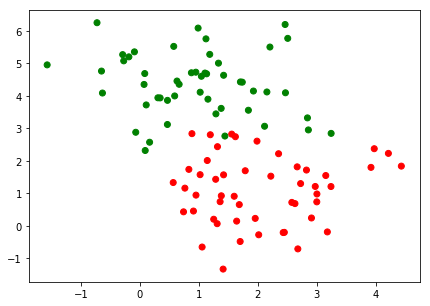

In [505]:
color= ['red' if y == 1 else 'green' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

In [506]:
#1. inicilicemos parametros W y b
m = X.shape[1]

W = np.random.randn(X.shape[0],1)
b = 0

print("m: ", m)
print("W inicial: ",W)
print("b inicial: ",b)

('m: ', 100)
('W inicial: ', array([[ 1.76405235],
       [ 0.40015721]]))
('b inicial: ', 0)


In [507]:
#2. Regresion logistica mediante descenso del gradiente

learning_rate = 0.1

for i in range(10000): #1000 iteraciones del descenso del gradiente
    Z = linear_activation(W,b,X)
    A = sigmoid(Z)
    dz = A - Y
    dW = np.sum(np.multiply(X,dz)) / m
    db = np.sum(dz) / m
    J = np.sum(-(Y * np.log(A) + (1-Y)*np.log(1-A))) / m
    
    W -= learning_rate * dW
    b -= learning_rate * db
    
    if(i%1000 == 0):
        print("costo: ", J)

print("W actualizado: ",W)
print("b actualizado: ",b)
print("costo final (error), despues de ",i+1," iteraciones: ", J)

('costo: ', 1.7842017385260738)
('costo: ', 0.20098387988199984)
('costo: ', 0.19025959268776801)
('costo: ', 0.18833765607820785)
('costo: ', 0.18791586461941956)
('costo: ', 0.18781554182065935)
('costo: ', 0.18779079141419161)
('costo: ', 0.18778457705788765)
('costo: ', 0.18778300317468902)
('costo: ', 0.18778260283630627)
('W actualizado: ', array([[-0.25058128],
       [-1.61447642]]))
('b actualizado: ', 4.83711418819213)
('costo final (error), despues de ', 10000, ' iteraciones: ', 0.18778250083115047)


In [508]:
print(predict(W,b,X))

[[ 1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.
   1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.
   1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.
   0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.
   1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.
   1.  1.  1.  1.  0.  0.  1.  1.  0.  1.]]


In [509]:
def visualize_lr(W, b, X, y):
    X = X.T
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = pred_func(W,b,np.c_[xx.ravel(), yy.ravel()])
    Z = predict(W,b,np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

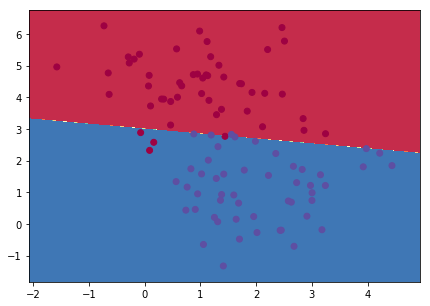

In [510]:
visualize_lr(W, b, X, Y)